## Monte Carlo Simulation



In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [16]:
tickers = ["FB", "IBM", "AMZN", "AAPL"]

df_list = []
for ticker in tickers:
    df = pd.read_csv("ticker-" + ticker.lower() + ".csv", index_col=0, parse_dates=True)
    df_list.append(df['Adj Close'])

data = pd.concat(df_list, axis=1)
data.columns = tickers

In [17]:
log_returns = np.log(data/data.shift())

In [18]:
weight = np.random.random(4)
# to get weight sum to 1 
weight /= np.sum(weight)

In [19]:
exp_return = np.sum(log_returns.mean()*weight)*252

In [20]:
# use linear algebra to calculate expected volatility to make it faster
exp_volatility = np.sqrt(np.dot(weight.T, np.dot(log_returns.cov()*252, weight)))

In [21]:
sharpe_ratio = exp_return/exp_volatility

In [22]:
sharpe_ratio

0.46494285811359426

In [26]:
# 5000 Monte Carlo Simulations
n = 5000
# 4 stocks in portfolio
weights = np.zeros((n, 4))
# store all info with zeros intiially
exp_returns = np.zeros(n)
exp_volatilities = np.zeros(n)
sharpe_ratios = np.zeros(n)

for i in range(n):
    weight = np.random.random(4)
    weight /= np.sum(weight)
    # fill weight with 1
    weights[i] = weight
    
    exp_returns[i] = np.sum(log_returns.mean()*weight)*252
    exp_volatilities[i] = np.sqrt(np.dot(weight.T, np.dot(log_returns.cov()*252, weight)))
    sharpe_ratios[i] = exp_returns[i] / exp_volatilities[i]

In [27]:
sharpe_ratios.max()

1.1460557145343806

In [28]:
# argument of maximum entry
sharpe_ratios.argmax()

253

In [29]:
weights[3448]

array([0.20365761, 0.29649363, 0.29786813, 0.20198064])

<IPython.core.display.Javascript object>


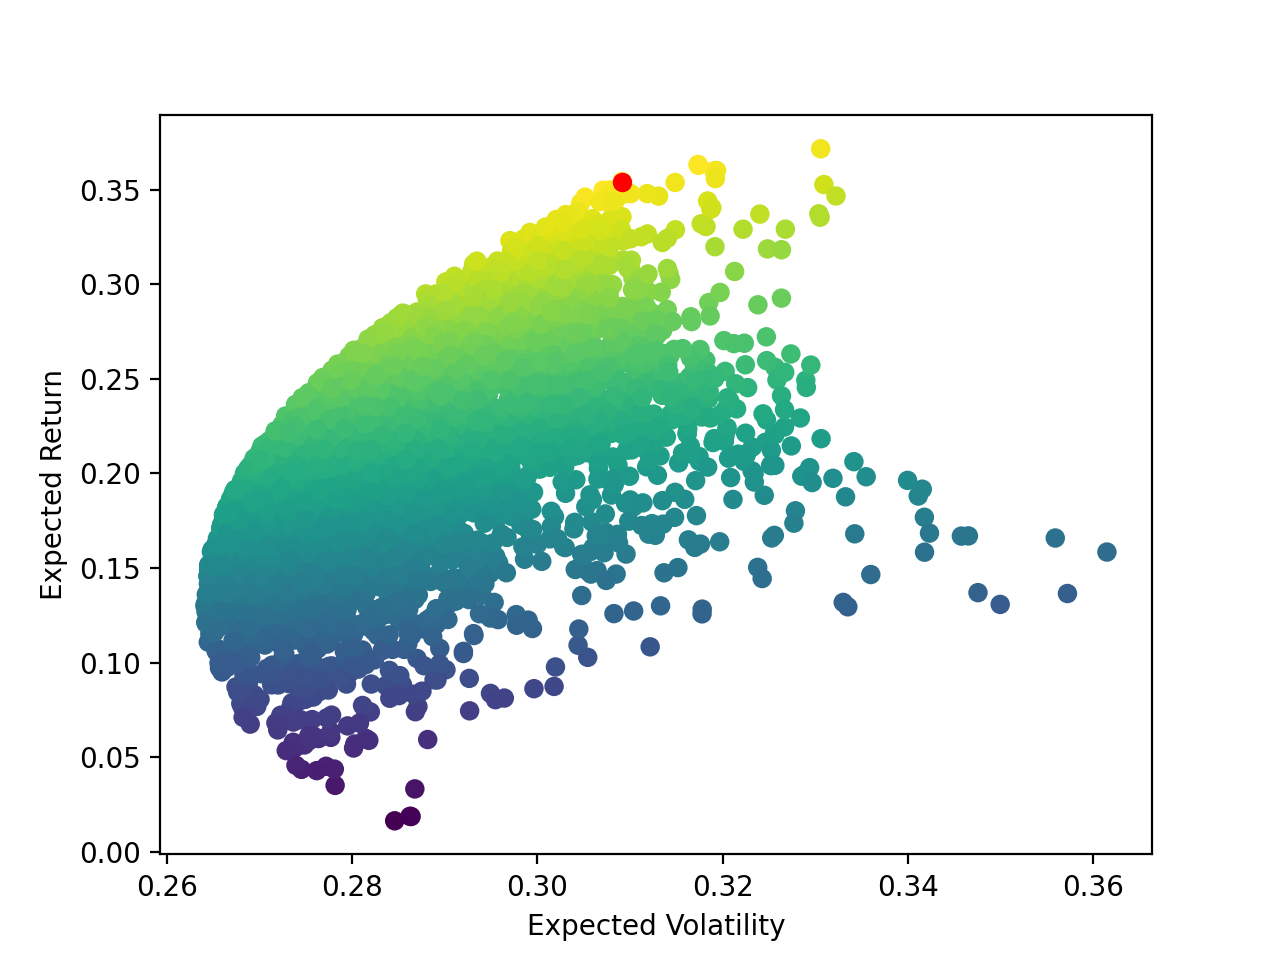

Text(0, 0.5, 'Expected Return')

In [32]:
fig, ax = plt.subplots()
ax.scatter(exp_volatilities, exp_returns, c= sharpe_ratios)
# red dot to signify max value
ax.scatter(exp_volatilities[sharpe_ratios.argmax()], exp_returns[sharpe_ratios.argmax()], c= 'r')
ax.set_xlabel('Expected Volatility')
ax.set_ylabel('Expected Return')